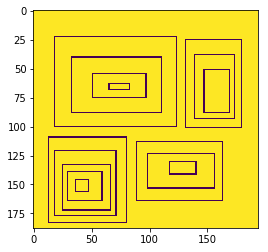

In [36]:
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.filters import threshold_sauvola 
import numpy as np

img = rgb2gray(imread('resources/labelhierarchy.png'))

plt.imshow(img)


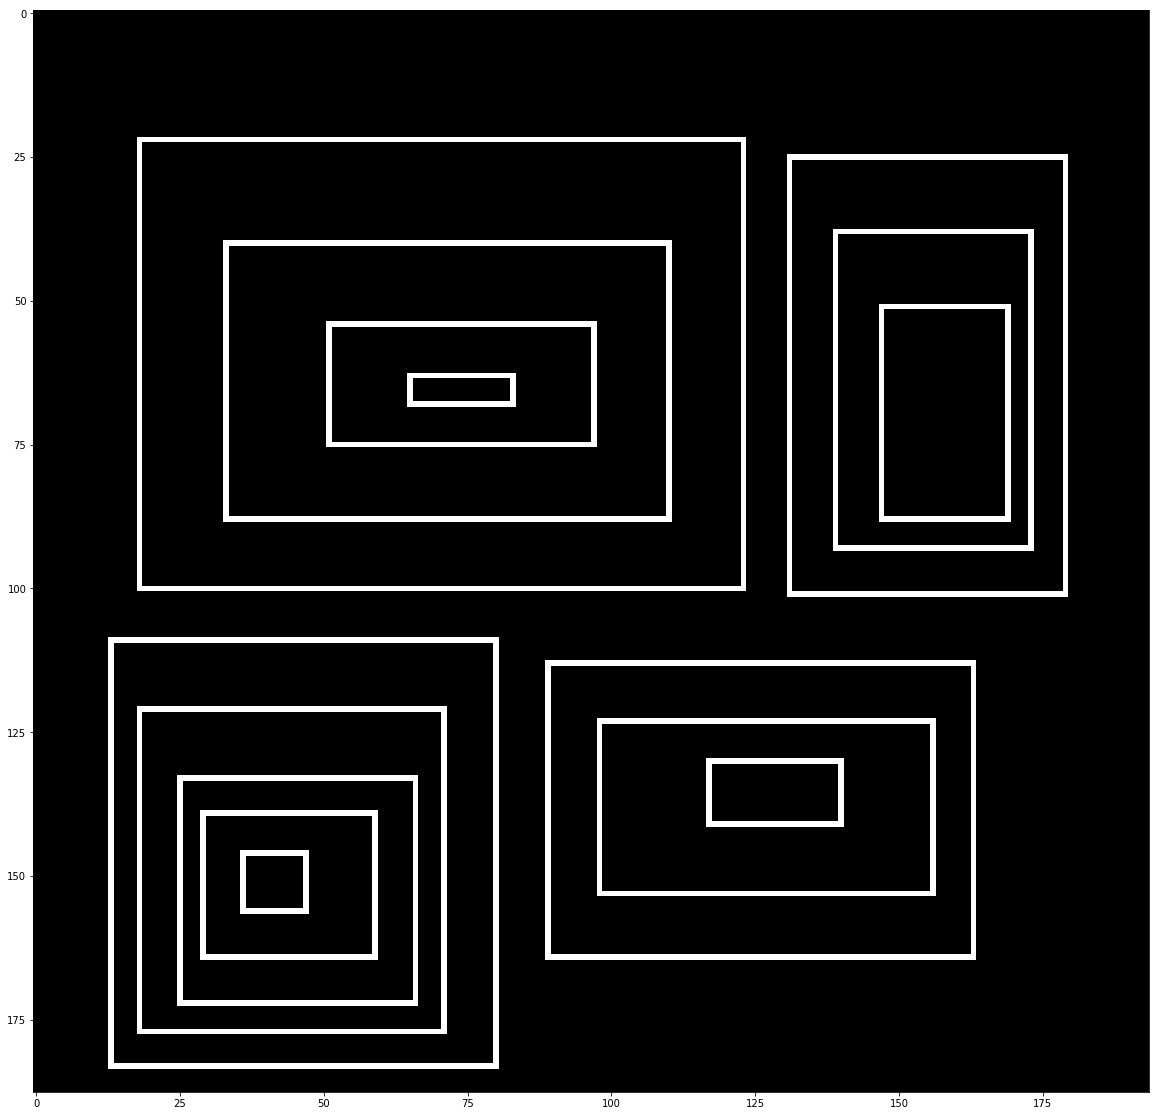

In [37]:
# binarize
window_size = 25
thresh_sauvola = threshold_sauvola(img, window_size=window_size)
binary_sauvola = img < thresh_sauvola
plt.figure(figsize=(20,20))
plt.imshow(binary_sauvola, cmap="gray")

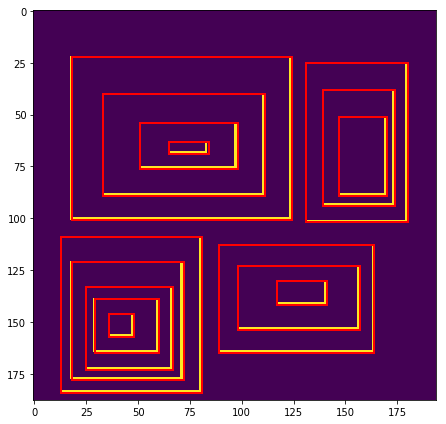

In [38]:
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches

label_image = label(binary_sauvola)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(binary_sauvola)

for region in regionprops(label_image):
    # draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

#ax.set_axis_off()
plt.tight_layout()
plt.show()

clearing
clearing
clearing


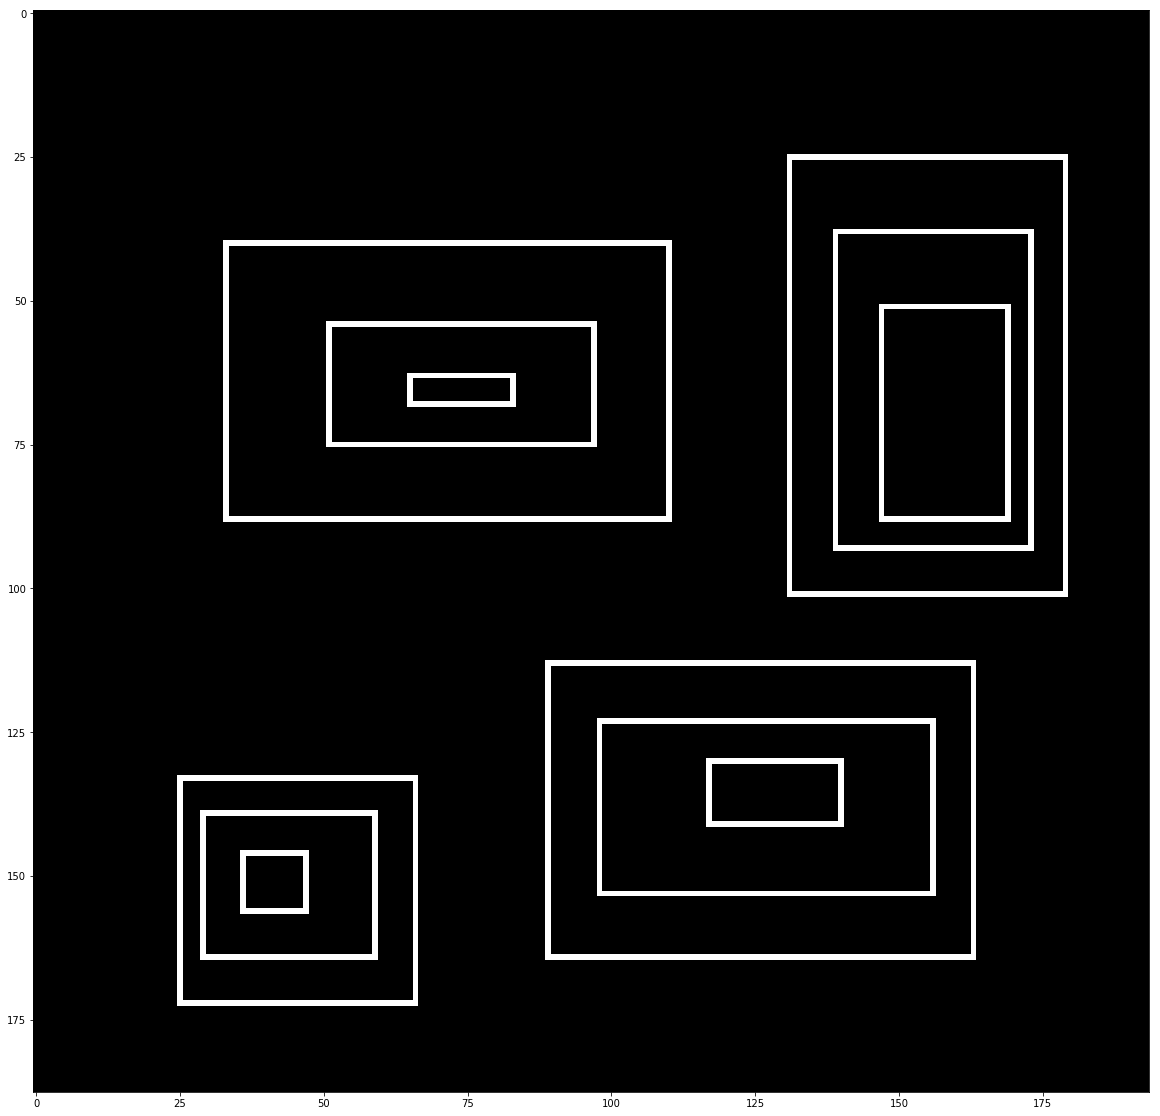

In [47]:
maxr, maxc = binary_sauvola.shape
def is_a_child(root_region, child_region):
    rminr, rminc, rmaxr, rmaxc = root_region.bbox
    minr, minc, maxr, maxc = child_region.bbox
    if minr > rminr and minc > rminc and maxr < rmaxr and maxc < rmaxc:
        return True
    return False

cleaner_img = np.copy(binary_sauvola)
region_props = regionprops(label_image)
label_heirarchy = {}
for iindex, iregion  in enumerate(region_props[0:-1]):
    count = 0 
    for jindex, jregion in enumerate(region_props[1:]):
        if is_a_child(iregion, jregion):
            count += 1
            if iregion.label not in label_heirarchy:
                label_heirarchy[iregion.label] = []
            label_heirarchy[iregion.label].append(jregion.label)
            
    if count > 3:
        print("clearing")
        # clear the region
        coords = iregion.coords
        for c in coords:
            cleaner_img[c[0],c[1]] = 0            
            
plt.figure(figsize=(20,20))
plt.imshow(cleaner_img, cmap="gray")

In [46]:
label_heirarchy

{1: [4, 6, 7],
 2: [3, 5],
 3: [5],
 4: [6, 7],
 6: [7],
 8: [10, 13, 14, 15],
 9: [11, 12],
 10: [13, 14, 15],
 11: [12],
 13: [14, 15],
 14: [15]}